## Figure 7: 50K Cancellation By Net Worth, Race

from "Student Debt Cancellation *Is* Progressive", a Roosevelt Institute research paper 

by Charlie Eaton, Adam Goldstein, Laura Hamilton, and Frederick Wherry

In [1]:
ssc install dubois

checking dubois consistency and verifying not already installed...
all files already exist and are up to date.


In [2]:
graph set svg fontface Tahoma
graph set eps fontface Tahoma
graph set ps fontface Tahoma
set scheme dubois

In [3]:
qui {
    clear
    set obs 300
gen obs = _n
    ** numerator is value of student debt for a category. 
    ** denominator is student debt value of reference category
local black010 = round(169-(17365.92/17365.92)*96)
local white010 = round(169-(12616.59/17365.92)*96)
local latinx010 = round(169-(11089.85/17365.92)*96)
local top7080 = round(169-(1508.391/17365.92)*96)
local top8090 = round(169-(1074.591/17365.92)*96)
local top90100 = round(169-(561.7665/17365.92)*96)
}

In [4]:
qui {

gen textx = .
gen texty = .
gen textt = ""
replace textx = 0 in 1
replace texty = 2.735 in 1
replace textt = "Bottom 10% for wealth, Black - $17,366" in 6
replace textx = 0 in 2
replace texty = 2.62 in 2
replace textt = "Bottom 10% for wealth, white - $12,617" in 5
replace textx = 0 in 3
replace texty = 2.51 in 3
replace textt = "Bottom 10% for wealth, Latinx - $11,090" in 4
replace textx = 0 in 4
replace texty = 2.4 in 4
replace textt = "70th to 80th wealth perctile, all races - $1,508" in 3
replace textx = 0 in 5
replace texty = 2.29 in 5
replace textt = "80th to 90th wealth percentile, all races - 1,075" in 2
replace textx = 0 in 6
replace texty = 2.18 in 6
replace textt = "Top 10% for wealth, all races - $562" in 1
}

In [5]:
qui {

gen line1 = 0.50 + (_n / 100) in `black010'/169     // 0.5 = scaling factor 100 = space between the spirals 73 = inside point, 169 = top of spiral
gen line2 = 0.61 + (_n / 100) in `white010'/169
gen line3 = 0.73 + (_n / 100) in `latinx010'/169
gen line4 = 0.84 + (_n / 100) in `top7080'/169
gen line5 = 0.95 + (_n / 100) in `top8090'/169
gen line6 = 1.06 + (_n / 100) in `top90100'/169
gen angle = _n * 2 * _pi / 52   // adding +/- changes the direction of the spiral
gen x1 = (line1 * cos(angle)) 
gen y1 = (line1 * sin(angle))
gen x2 = (line2 * cos(angle)) 
gen y2 = (line2 * sin(angle))
gen x3 = (line3 * cos(angle)) 
gen y3 = (line3 * sin(angle))
gen x4 = (line4 * cos(angle)) 
gen y4 = (line4 * sin(angle))
gen x5 = (line5 * cos(angle)) 
gen y5 = (line5 * sin(angle))
gen x6 = (line6 * cos(angle)) 
gen y6 = (line6 * sin(angle))
}

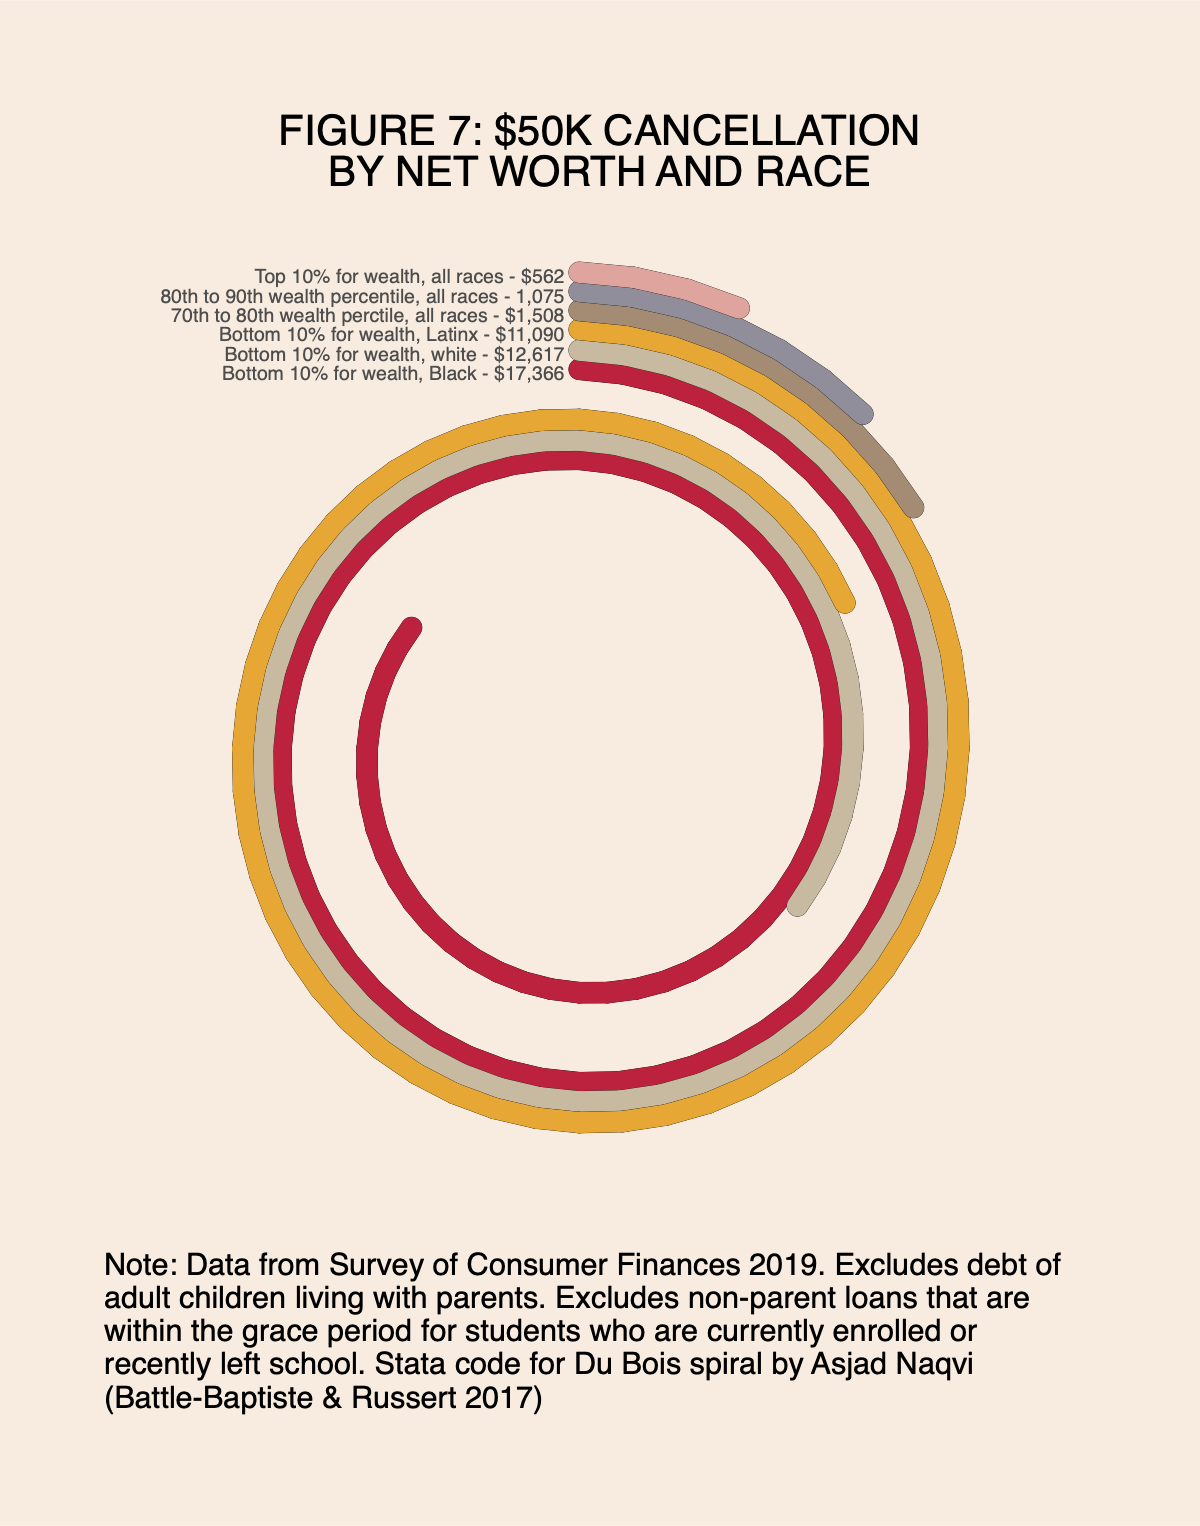

In [6]:
twoway ///
   (line y1 x1, lc(black)  lp(solid) lw(1.8)) ///
   (line y1 x1, lc("202 55 78")  lp(solid) lw(1.77)) /// 
   (line y2 x2, lc(black)  lp(solid) lw(1.8)) ///
   (line y2 x2, lc("210 198 176")  lp(solid) lw(1.77)) ///  
   (line y3 x3, lc(black) lp(solid) lw(1.8)) ///
   (line y3 x3, lc("237 181 67") lp(solid) lw(1.77)) ///
   (line y4 x4, lc(black)  lp(solid) lw(1.8)) ///
   (line y4 x4, lc("179 157 134")  lp(solid) lw(1.77)) ///
   (line y5 x5, lc(black)  lp(solid) lw(1.8)) ///
   (line y5 x5, lc("160 160 170")  lp(solid) lw(1.77)) ///
   (line y6 x6, lc(black)  lp(solid) lw(1.8)) ///
   (line y6 x6, lc("230 180 173")  lp(solid) lw(1.77)) ///
   (scatter texty textx, mc(none) ms(point) mlab(textt) mlabpos(9) mlabc(gs6) mlabsize(1.8)) ///
     ,    ///
    aspect(1) legend(off)  ///
    xlabel(-2.75(0.5)3, nogrid) ylabel(-2.5(0.5)3, nogrid) ///
    xscale(off) yscale(off)  ///
    title("FIGURE 7: $50K CANCELLATION" "BY NET WORTH AND RACE", size(3.5)) ///
    note(" " "Note: Data from Survey of Consumer Finances 2019. Excludes debt of" ///
        "adult children living with parents. Excludes non-parent loans that are" ///
        "within the grace period for students who are currently enrolled or" ///
        "recently left school. Stata code for Du Bois spiral by Asjad Naqvi" ///
        "(Battle-Baptiste & Russert 2017)", size(small) xoffset(0)) graphregion(margin(large)) ///

qui graph export figures/f7_spiralcancelnetworthrace.pdf, replace
qui graph export figures/f7_spiralcancelnetworthrace.png, replace

In [7]:
use data/scfstudentdebt2019, clear

In [8]:
xtile worthdecile=networth [pw=wgt],n(10)
label define worthdecile 1 "0-10%" 2 "10-20%" 3 "20-30%" 4 "30-40%" 5 "40-50%" ///
6 "50-60%" 7 "60-70%" 8 "70-80%" 9 "80-90%" 10 "90-100%"
label values worthdecile incomedecile

In [9]:
qui {

gen selfparent=self_fedloans + parent_fedloans
foreach amt in 10000 50000 75000 {
gen selfcancel`amt'=`amt'
    replace selfcancel`amt'=selfparent if selfparent<`amt'

gen spousecancel`amt'=`amt'
replace spousecancel`amt'=spouse_fedloans if spouse_fedloans<`amt'
  
egen householdcancel`amt'=rowtotal(selfcancel`amt' spousecancel`amt')

gen percapcancel`amt'=householdcancel`amt'
    replace percapcancel`amt'=householdcancel`amt' / 2  if married==1 & householdcancel`amt'!=0
    }
}    

In [10]:
qui regress percapcancel50000 i.worthdecile [pw=wgt] 
margins i.worthdecile




Adjusted predictions                            Number of obs     =     28,885
Model VCE    : Robust

Expression   : Linear prediction, predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 worthdecile |
          1  |   14423.16   375.7617    38.38   0.000     13686.65    15159.67
          2  |   591.1248   73.70111     8.02   0.000     446.6672    735.5824
          3  |   1553.518    135.828    11.44   0.000     1287.289    1819.748
          4  |   2992.709    200.728    14.91   0.000     2599.273    3386.145
          5  |   2350.267   177.6783    13.23   0.000     2002.009    2698.525
          6  |   1945.564   170.4576    11.41   0.000     1611.459    2279.669
          7  |   1971.601   171.3394    11.51   0.000     1635.767    2307.434
      

In [11]:
qui regress percapcancel50000 i.worthdecile##i.race [pw=wgt] 
margins i.worthdecile#i.race if race<4 




Adjusted predictions                            Number of obs     =     27,251
Model VCE    : Robust

Expression   : Linear prediction, predict()

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 worthdecile#|
        race |
    1#Black  |   17365.92   779.0719    22.29   0.000      15838.9    18892.94
   1#Latinx  |   11089.85   922.9401    12.02   0.000     9280.843    12898.85
    1#white  |   13812.76   485.5785    28.45   0.000     12861.01    14764.52
    2#Black  |   189.7774   48.75765     3.89   0.000     94.21011    285.3446
   2#Latinx  |   392.6865   99.21239     3.96   0.000     198.2256    587.1473
    2#white  |   1011.579   157.6576     6.42   0.000      702.563    1320.595
    3#Black  |   1328.619   257.8646     5.15   0.000     823.1921    


  Variables that uniquely identify margins: worthdecile race


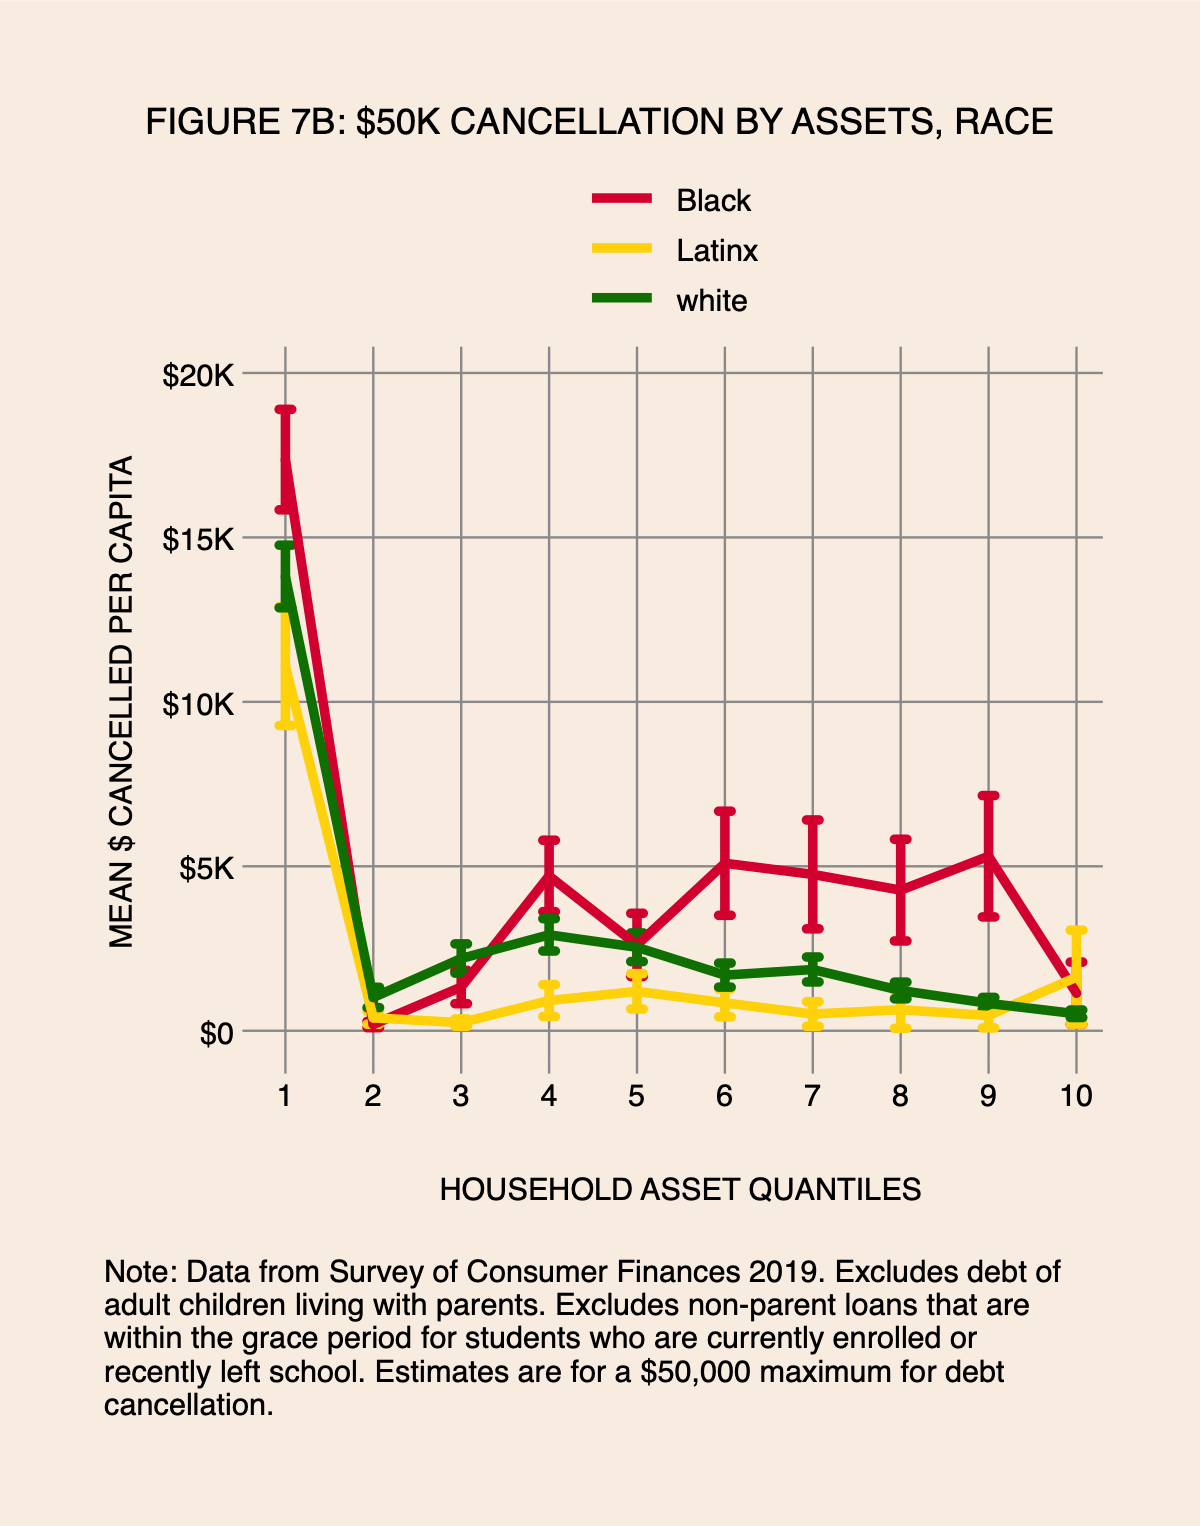

In [12]:
marginsplot, name(low, replace) legend(pos(12)) ///
ytitle(MEAN $ CANCELLED PER CAPITA) title("FIGURE 7B: $50K CANCELLATION BY ASSETS, RACE") ///
xscale(titlegap(large)) xtitle(HOUSEHOLD ASSET QUANTILES)  ///
    note(" " "Note: Data from Survey of Consumer Finances 2019. Excludes debt of" ///
        "adult children living with parents. Excludes non-parent loans that are" ///
        "within the grace period for students who are currently enrolled or" ///
        "recently left school. Estimates are for a $50,000 maximum for debt" ///
        "cancellation.", size(small) xoffset(0)) graphregion(margin(large)) ///
        ylabel(0 "$0" 5000 "$5K" 10000 "$10K" 15000 "$15K" 20000 "$20K") scheme(dubois)